In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/Iris.csv")

In [5]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [7]:
x=df.iloc[:,2:4]
y=df.iloc[:,4]

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x =StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [19]:
ytrain = pd.cut(ytrain, bins=3, labels=[0, 1, 2])

In [20]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(xtrain, ytrain)

GaussianNB()

In [17]:
ypred=gaussian.predict(xtest)

In [22]:
ytest = pd.cut(ytest, bins=3, labels=[0, 1, 2])
ypred = pd.cut(ypred, bins=3, labels=[0, 1, 2])

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest, ypred)
print(cm)

[[11  0  0]
 [ 0 13  1]
 [ 0  2  3]]


In [24]:
 from sklearn.metrics import precision_score,accuracy_score, recall_score

In [30]:
accuracy=accuracy_score(ytest, ypred)
precision=precision_score(ytest, ypred, average='micro')
recall = recall_score(ytest, ypred, average='micro')

In [31]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.90
Precision: 0.90
Recall: 0.90


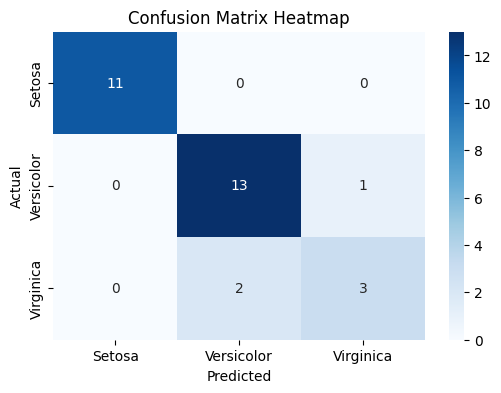

In [32]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'],
yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()